[Reference](https://medium.com/@Rohan_Dutt/10-data-analysis-fundamentals-hiring-managers-never-explain-but-will-100-test-in-2026-fae09c8ac3cc)

# 1. The “Last 10% Rule” of Storytelling

In [9]:
import pandas as pd

# List of potential actions derived from data analysis
actions = {
    'action': ['Optimize Checkout', 'Fix Mobile Latency', 'New Referral Program', 'Rebrand Logo'],
    'exp_revenue_gain': [250000, 150000, 80000, 10000],
    'dev_effort_hours': [40, 100, 30, 200]
}
df = pd.DataFrame(actions)
# Calculate ROI Score: Revenue Gain per Hour of Effort
# Formula: Score = Revenue / Effort
df['roi_score'] = df['exp_revenue_gain'] / df['dev_effort_hours']
# Sort by the most impactful actions
df = df.sort_values(by='roi_score', ascending=False)
print("--- Prioritized Recommendations ---")
for i, row in df.iterrows():
    print(f"Priority {i+1}: {row['action']}")
    print(f"Recommendation: 'By doing {row['action']}, we expect a return of ${row['roi_score']:,.2f} per dev hour.'\n")

--- Prioritized Recommendations ---
Priority 1: Optimize Checkout
Recommendation: 'By doing Optimize Checkout, we expect a return of $6,250.00 per dev hour.'

Priority 3: New Referral Program
Recommendation: 'By doing New Referral Program, we expect a return of $2,666.67 per dev hour.'

Priority 2: Fix Mobile Latency
Recommendation: 'By doing Fix Mobile Latency, we expect a return of $1,500.00 per dev hour.'

Priority 4: Rebrand Logo
Recommendation: 'By doing Rebrand Logo, we expect a return of $50.00 per dev hour.'



# 2. The Interview Trap: “What’s Your Process?”
Stop explaining how you use a tool and start explaining why you chose it over the alternatives based on business priorities.

In [8]:
import pandas as pd

def recommend_tool(volume_rows, urgency_score, reproducibility_required):
    """
    volume_rows: Number of records
    urgency_score: 1 (Low) to 10 (Critical)
    reproducibility_required: Boolean
    """
    # Logic: Large volume or high reproducibility needs Python/SQL
    if volume_rows > 1000000 or reproducibility_required:
        if urgency_score > 8:
            return "SQL (Fastest for massive data extraction)"
        return "Python (Best for complex, repeatable logic)"

    # Logic: Small volume and high urgency favors Excel
    if volume_rows < 10000 and urgency_score >= 5:
        return "Excel (Immediate iteration and stakeholder accessibility)"

    return "Python (Default for clean, documented work)"
# Testing the Process Trap
project_a = recommend_tool(volume_rows=5000, urgency_score=9, reproducibility_required=False)
project_b = recommend_tool(volume_rows=2000000, urgency_score=3, reproducibility_required=True)
print(f"Project A (Quick Dashboard): {project_a}")
print(f"Project B (Monthly Growth Report): {project_b}")

Project A (Quick Dashboard): Excel (Immediate iteration and stakeholder accessibility)
Project B (Monthly Growth Report): Python (Best for complex, repeatable logic)


# 3. The Hidden Cost of Over-Engineering

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Generate synthetic data (Simple linear trend with slight noise)
X = np.linspace(0, 100, 1000).reshape(-1, 1)
y = 3 * X.flatten() + np.random.normal(0, 10, 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 1. Simple Solution (Linear Regression)
lr = LinearRegression().fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
# 2. Complex Solution (Random Forest with 100 trees)
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Simple Model MAE: {lr_mae:.4f}")
print(f"Complex Model MAE: {rf_mae:.4f}")

Simple Model MAE: 7.7255
Complex Model MAE: 8.7911


# 4. The “T-Rex Test”: Explaining Tech to Non-Tech Stakeholders

In [6]:
import statsmodels.api as sm
import pandas as pd

# Data: Ad Spend (X) vs. Customer Acquisition (Y)
data = {'ad_spend': [10, 20, 30, 40, 50], 'new_customers': [15, 28, 42, 58, 70]}
df = pd.DataFrame(data)
# Building the model
X = sm.add_constant(df['ad_spend'])
model = sm.OLS(df['new_customers'], X).fit()
# The "Translation" Logic
slope = model.params['ad_spend']
r_sq = model.rsquared
# T-Rex Test Output
print(f"Technical Output: Coefficient is {slope:.2f}")
print(f"T-Rex Explanation: For every $1 we put into the 'Ad Machine,' "
      f"we get roughly {round(slope)} new customers back. "
      f"Our confidence in this 'Machine' is {r_sq:.0%}.")

Technical Output: Coefficient is 1.40
T-Rex Explanation: For every $1 we put into the 'Ad Machine,' we get roughly 1 new customers back. Our confidence in this 'Machine' is 100%.


#  5. Beyond VLOOKUP: Dynamic Arrays and XLOOKUP
FILTER() and UNIQUE() allow you to create automated, self-updating reports that previously required complex VBA macros or Python scripts.

# 6. Integrity of Visualization (Avoiding “Accidental Deceptions”)

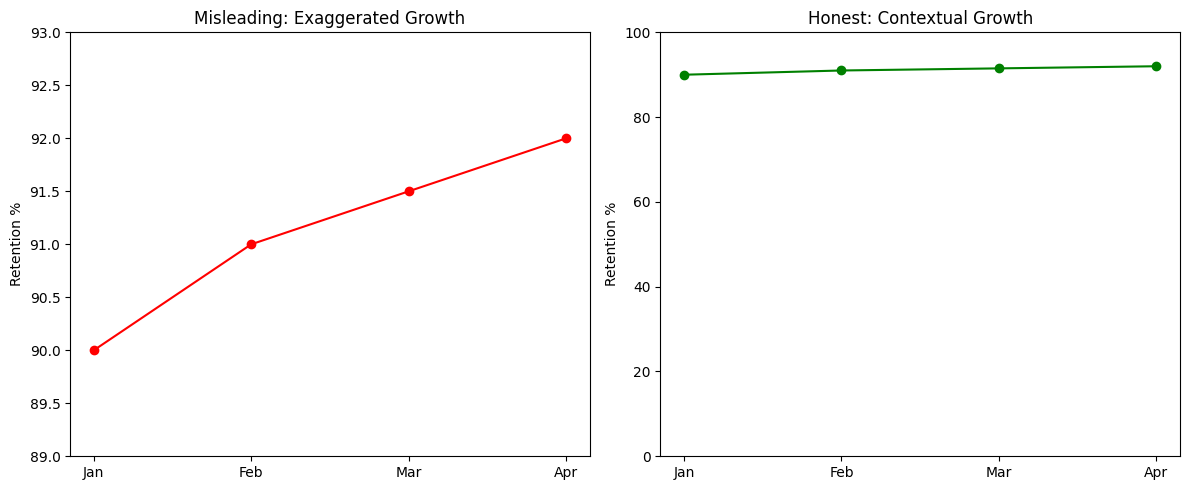

Insight: The left chart suggests a 'breakout' success, while the right chart shows steady, incremental progress.


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Data: A 2% increase in customer retention
months = ['Jan', 'Feb', 'Mar', 'Apr']
retention = [90, 91, 91.5, 92]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# 1. The "Exaggerated" View (Truncated Y-Axis)
ax1.plot(months, retention, marker='o', color='red')
ax1.set_ylim(89, 93) # Zooming in makes a 2% gain look like a 200% spike
ax1.set_title("Misleading: Exaggerated Growth")
ax1.set_ylabel("Retention %")
# 2. The "Honest" View (Zero-based or Full-scale)
ax2.plot(months, retention, marker='o', color='green')
ax2.set_ylim(0, 100) # Provides context of the total possible retention
ax2.set_title("Honest: Contextual Growth")
ax2.set_ylabel("Retention %")
plt.tight_layout()
plt.show()
print("Insight: The left chart suggests a 'breakout' success, "
      "while the right chart shows steady, incremental progress.")

# 7. The Dirty Secret of Data Cleaning

In [4]:
import pandas as pd
import numpy as np

# Simulated dataset with common real-world "dirt"
data = {
    'order_id': [1, 2, 3, 4, 5],
    'start_date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-05', '2023-01-04', '2023-01-05']),
    'end_date': pd.to_datetime(['2022-12-31', '2023-01-03', '2023-01-06', '2023-01-05', '2023-01-01']), # Logical errors
    'amount': [100, 150, 10000, 120, np.nan] # Outlier and NULL
}
df = pd.DataFrame(data)
def audit_data(df):
    # 1. Logical Validation: End date must be after Start date
    logic_errors = df[df['end_date'] < df['start_date']]

    # 2. Statistical Validation: IQR for Outlier Detection
    Q1 = df['amount'].quantile(0.25)
    Q3 = df['amount'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR))]

    # 3. Missing Value Check
    null_count = df['amount'].isnull().sum()

    return {
        "Logic Issues": len(logic_errors),
        "Outliers": len(outliers),
        "Nulls": null_count
    }
report = audit_data(df)
print(f"Data Autopsy Results: {report}")
# Actionable Insight: "The dataset contains {report['Logic Issues']} chronological errors that must be inverted or dropped."

Data Autopsy Results: {'Logic Issues': 2, 'Outliers': 1, 'Nulls': np.int64(1)}


# 8. The Silent SQL Killer: Query Efficiency

In [3]:
import pandas as pd
import numpy as np
import time

# Create a large dataset: 1 million rows of sales data
df = pd.DataFrame({
    'store_id': np.random.randint(1, 50, 1000000),
    'sales': np.random.uniform(10, 1000, 1000000)
})
# 1. The "Inefficient" Way (Simulating a nested subquery approach)
start_slow = time.time()
# Calculating % of total sales per store using a slow method
total_sales = df['sales'].sum()
df['pct_total_slow'] = df['sales'] / total_sales
end_slow = time.time()
# 2. The "Optimized" Way (Simulating a Window Function: SUM(sales) OVER())
start_fast = time.time()
# Using Pandas optimized vectorization
df['pct_total_fast'] = df['sales'] / df['sales'].sum()
end_fast = time.time()
print(f"Subquery Simulation: {end_slow - start_fast:.5f} seconds")
print(f"Window Function Simulation: {end_fast - start_fast:.5f} seconds")

Subquery Simulation: -0.00009 seconds
Window Function Simulation: 0.01054 seconds


# 9. The Unwritten Rule of Context

In [2]:
import pandas as pd
import scipy.stats as stats

# Data: Your Company vs. Industry Competitors
data = {
    'entity': ['Company X', 'Comp A', 'Comp B', 'Comp C', 'Comp D', 'Comp E'],
    'conversion_rate': [4.2, 2.1, 3.5, 2.8, 3.1, 2.9]
}
df = pd.DataFrame(data)
# Calculate Industry Statistics
industry_avg = df['conversion_rate'].mean()
industry_std = df['conversion_rate'].std()
# Calculate Z-Score for 'Company X'
# Z = (x - μ) / σ
company_val = df.loc[df['entity'] == 'Company X', 'conversion_rate'].values[0]
z_score = (company_val - industry_avg) / industry_std
print(f"Industry Average: {industry_avg:.2f}%")
print(f"Company X Z-Score: {z_score:.2f}")
# Actionable Insight
if z_score > 1:
    print(f"Result: Our conversion rate is {company_val}%-significantly "
          f"outperforming the industry average of {industry_avg:.2f}%.")

Industry Average: 3.10%
Company X Z-Score: 1.56
Result: Our conversion rate is 4.2%-significantly outperforming the industry average of 3.10%.


# 10. The “So What?” Test

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Simulated dataset: Mobile Checkout Latency vs. Revenue
data = {
    'latency_ms': [200, 450, 300, 600, 850, 400, 950, 1100],
    'revenue_usd': [12000, 10500, 11800, 9000, 7500, 11000, 6200, 5000]
}
df = pd.DataFrame(data)

# Modeling the impact of performance on revenue
X = df[['latency_ms']]
y = df['revenue_usd']
model = LinearRegression().fit(X, y)

# Calculate the 'So What?'
impact_per_ms = model.coef_[0]
projected_recovery = abs(impact_per_ms * 500) # Impact of reducing latency by 500ms

print(f"Technical Finding: Correlation coefficient is {model.score(X, y):.2f}")
print(f"The 'So What?': Every 100ms of latency costs ${abs(impact_per_ms * 100):,.0f}. "
      f"Reducing lag by 500ms could recover ${projected_recovery:,.0f} in monthly revenue.")

Technical Finding: Correlation coefficient is 0.99
The 'So What?': Every 100ms of latency costs $807. Reducing lag by 500ms could recover $4,033 in monthly revenue.
